In [ ]:
from zipfile import ZipFile
with ZipFile('/content/archive.zip', 'r') as Z:
    Z.extractall("/content/archive")


In [ ]:
import pandas as pd
data = pd.read_csv("/content/archive.zip")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape

(5110, 12)

In [ ]:
unknown_indices = data[data['smoking_status'] == 'Unknown'].index
data.drop(index=unknown_indices, inplace=True)

In [ ]:
data.shape

(3566, 12)

In [ ]:
data = data.dropna(subset=['bmi'])

In [ ]:
data.shape

(3426, 12)

In [ ]:
data['work_type'].value_counts()

,count
work_type,
Private,2201
Self-employed,629
Govt_job,514
children,68
Never_worked,14


In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


LabelEncoder assigns labels in alphabetical order

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['work_type'] = le.fit_transform(data['work_type'])
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [ ]:
data['gender'] = le.fit_transform(data['gender'])
data['gender'].unique()

array([1, 0, 2])

In [ ]:
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

array([1, 0])

In [ ]:
data['ever_married'] = le.fit_transform(data['ever_married'])
data['ever_married'].unique()

array([1, 0])

In [ ]:
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

array([0, 1, 2])

In [ ]:
data.shape

(3426, 12)

In [ ]:


import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
gender_counts = data['gender'].value_counts()
custom_colors = ['#9C9C9C' , '#252E6C',  '#893F3D']

fig1 = px.bar(gender_counts, x=gender_counts.index, y=gender_counts.values, color=gender_counts.index,
              color_discrete_map={gender: color for gender, color in zip(gender_counts.index, custom_colors)})
fig1.update_layout(title='Gender Distribution')
fig1.show()

In [ ]:
age_stroke_counts = data.groupby(["age", "stroke"]).size().reset_index(name="Count")
fig_bubble_age_stroke = px.scatter(age_stroke_counts, x="age", y="Count", size="Count", color="stroke",
                                   title="Distribution of Stroke Across Age Groups",
                                   labels={"age": "Age", "Count": "Count", "stroke": "Stroke"},
                                   color_discrete_sequence=['#252E6C', '#BC3030'] )

fig_bubble_age_stroke.update_layout(xaxis_title="Age", yaxis_title="Count")
fig_bubble_age_stroke.show()

In [ ]:
stroke_counts = data['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['#252E6C', '#BC3030']
fig = px.pie(stroke_counts, names='Stroke', values='Count',
             title='Distribution of Stroke Status',
             color_discrete_sequence=custom_colors,
             hole=0.3
             )

fig.show()

In [ ]:
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_percentage = (gender_stroke_counts[1] / (gender_stroke_counts[0] + gender_stroke_counts[1])) * 100

fig = px.pie(names=gender_stroke_percentage.index, values=gender_stroke_percentage.values,
             title="Percentage of Stroke Cases by Gender",
             color_discrete_sequence=['#252E6C', '#9C9C9C'])

fig.update_traces(textinfo="percent+label", pull=[0.1, 0], marker=dict(line=dict(color="white", width=2)))
fig.show()

In [ ]:
import numpy as np
Q1 = np.percentile(data['bmi'], 25, method='midpoint')
Q3 = np.percentile(data['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR, Q3, Q1)

8.8 34.1 25.3


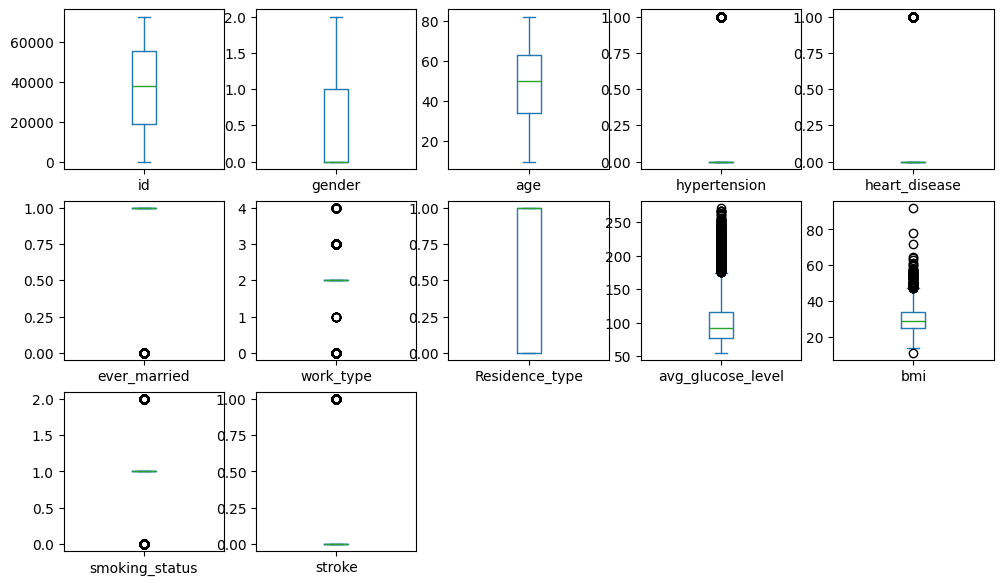

In [ ]:
ax_array = data.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
import matplotlib.pyplot as plt
plt.show()

Removing the outliers


In [ ]:
data.shape

(3426, 12)

In [ ]:
print(data['stroke'].value_counts())

stroke
0    3246
1     180
Name: count, dtype: int64


SMOTE Oversampling: The Synthetic Minority Oversampling Technique (SMOTE) was applied to balance the imbalanced dataset. SMOTE generates synthetic samples for the minority class (stroke cases), increasing their representation.

The original cleaned dataset had 179 stroke cases and 3,247 non-stroke cases.

After SMOTE, the stroke cases were oversampled to match the majority class, likely resulting in 3,247 stroke cases and 3,247 non-stroke cases (totaling 6,494 samples).

Train-Test Split: The 6,126 samples in the confusion matrix suggest a further split (e.g., 80% training and 20% testing) or cross-validation folds, but the exact split ratio isn’t specified in the text.


Fold 1
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5856 (Balanced)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros



  Cumulative Test Samples So Far: 343

Fold 2
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5844 (Balanced)
  Cumulative Test Samples So Far: 686

Fold 3
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5836 (Balanced)
  Cumulative Test Samples So Far: 1029

Fold 4
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5826 (Balanced)
  Cumulative Test Samples So Far: 1372

Fold 5
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5844 (Balanced)
  Cumulative Test Samples So Far: 1715

Fold 6
  Original Train Size: 3083
  Test Size: 343
  After SMOTE - Train Size: 5836 (Balanced)
  Cumulative Test Samples So Far: 2058

Fold 7
  Original Train Size: 3084
  Test Size: 342
  After SMOTE - Train Size: 5844 (Balanced)
  Cumulative Test Samples So Far: 2400

Fold 8
  Original Train Size: 3084
  Test Size: 342
  After SMOTE - Train Size: 5862 (Balanced)
  Cumulative Test Samples So Far: 2742

Fold 9
  O

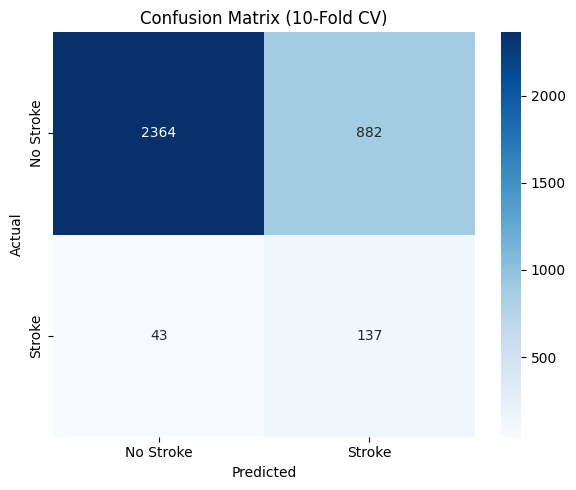

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop(columns=['stroke'])
y = data['stroke']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
     ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
])

kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_test_all = []
y_pred_all = []

fold = 1
for train_idx, test_idx in kf.split(X):
    print(f"\nFold {fold}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"  Original Train Size: {len(X_train)}")
    print(f"  Test Size: {len(X_test)}")

    # Fit preprocessor on training data only
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Apply SMOTE to training data
    smote = SMOTE(sampling_strategy=1.0, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

    print(f"  After SMOTE - Train Size: {len(X_resampled)} (Balanced)")

    # Train Logistic Regression
    lr = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
    lr.fit(X_resampled, y_resampled)

    # Predict on test data
    y_pred = lr.predict(X_test_processed)

    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

    print(f"  Cumulative Test Samples So Far: {len(y_test_all)}")
    fold += 1

conf_matrix = confusion_matrix(y_test_all, y_pred_all)
print(f"\nTotal test samples across all folds: {len(y_test_all)}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test_all, y_pred_all))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

# Create model
lr = LogisticRegression()

# Train time
start_train = time.time()
lr.fit(X_train, y_train)
end_train = time.time()
lr_train_time = end_train - start_train

# Test time
start_test = time.time()
y_pred_lr = lr.predict(X_test)
end_test = time.time()
lr_test_time = end_test - start_test

print(f"LR Train Time: {lr_train_time:.3f} sec")
print(f"LR Test Time: {lr_test_time:.3f} sec")


LR Train Time: 0.048 sec
LR Test Time: 0.002 sec


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Logistic Regression**


Class Distribution AFTER SMOTE:
stroke
1    3246
0    3246
Name: count, dtype: int64

Total dataset after SMOTE: 6492

Train size: 5193
Test size : 1299

Solver: sag, C: 0.01
Accuracy : 0.8029
Precision: 0.7860
Recall   : 0.8320
F1 Score : 0.8084
ROC AUC  : 0.8813

Solver: sag, C: 0.1
Accuracy : 0.8006
Precision: 0.7885
Recall   : 0.8213
F1 Score : 0.8045
ROC AUC  : 0.8816

Solver: sag, C: 1.0
Accuracy : 0.7998
Precision: 0.7881
Recall   : 0.8197
F1 Score : 0.8036
ROC AUC  : 0.8817

Solver: sag, C: 10.0
Accuracy : 0.7998
Precision: 0.7881
Recall   : 0.8197
F1 Score : 0.8036
ROC AUC  : 0.8817

Solver: saga, C: 0.01
Accuracy : 0.8029
Precision: 0.7860
Recall   : 0.8320
F1 Score : 0.8084
ROC AUC  : 0.8813

Solver: saga, C: 0.1
Accuracy : 0.8006
Precision: 0.7885
Recall   : 0.8213
F1 Score : 0.8045
ROC AUC  : 0.8816

Solver: saga, C: 1.0
Accuracy : 0.7998
Precision: 0.7881
Recall   : 0.8197
F1 Score : 0.8036
ROC AUC  : 0.8817

Solver: saga, C: 10.0
Accuracy : 0.7998
Precision: 0.7881
Reca

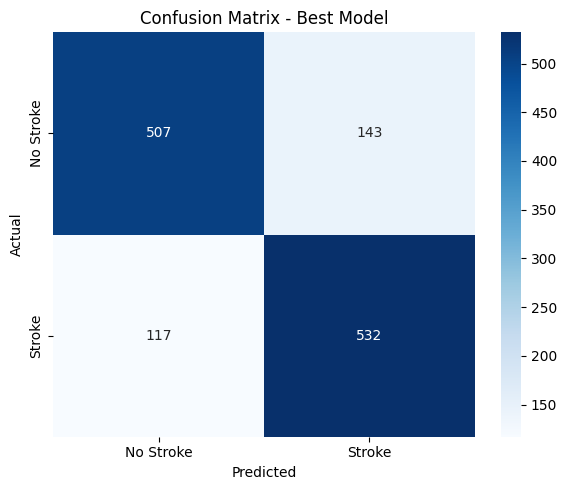

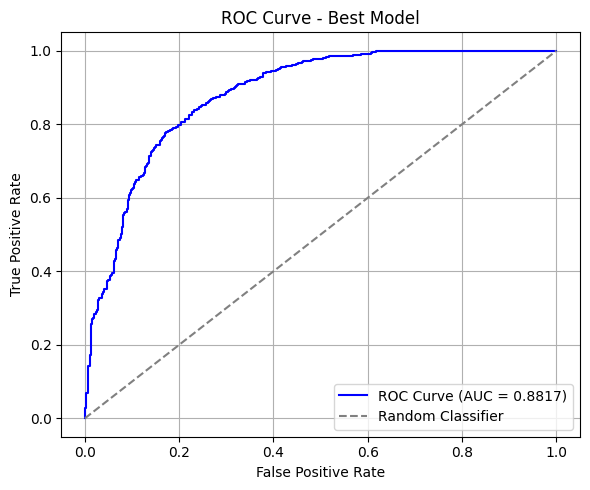

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("\nClass Distribution AFTER SMOTE:")
print(pd.Series(y_balanced).value_counts())
print(f"\nTotal dataset after SMOTE: {len(X_balanced)}")

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size : {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = [0.01, 0.1, 1.0, 10.0]
solvers = ['sag', 'saga']
results = []

for solver in solvers:
    for C in C_values:
        lr = LogisticRegression(
            penalty='l2',
            C=C,
            solver=solver,
            class_weight='balanced',
            max_iter=100,
            random_state=42
        )

        lr.fit(X_train_scaled, y_train)

        y_pred = lr.predict(X_test_scaled)
        y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

        # Use your original variable names
        lr_accuracy = accuracy_score(y_test, y_pred)
        lr_precision = precision_score(y_test, y_pred)
        lr_recall = recall_score(y_test, y_pred)
        lr_f1 = f1_score(y_test, y_pred)
        lr_roc_auc = roc_auc_score(y_test, y_pred_proba)

        lr_metrics = {
            "Accuracy": lr_accuracy,
            "Precision": lr_precision,
            "Recall": lr_recall,
            "F1 Score": lr_f1,
            "ROC AUC": lr_roc_auc
        }

        results.append({
            'Solver': solver,
            'C': C,
            **lr_metrics
        })

        print(f"\nSolver: {solver}, C: {C}")
        for key, value in lr_metrics.items():
            print(f"{key:9}: {value:.4f}")

results_df = pd.DataFrame(results)
print("\nSummary of All Results:")
print(results_df)

# Get best model based on ROC AUC
best_row = results_df.loc[results_df['ROC AUC'].idxmax()]
best_solver = best_row['Solver']
best_C = best_row['C']

print(f"\nBest Model → Solver: {best_solver}, C: {best_C}")

# Retrain best model for confusion matrix & ROC curve
best_lr = LogisticRegression(
    penalty='l2',
    C=best_C,
    solver=best_solver,
    class_weight='balanced',
    max_iter=100,
    random_state=42
)
best_lr.fit(X_train_scaled, y_train)
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {best_row["ROC AUC"]:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest**


Class Distribution AFTER SMOTE:
stroke
1    3246
0    3246
Name: count, dtype: int64

Total dataset after SMOTE: 6492 (Expected ≈ 6492)

Train size: 5193
Test size : 1299

Random Forest Model Performance on Test Set:
Accuracy : 0.9284
Precision: 0.9017
Recall   : 0.9615
F1 Score : 0.9306
ROC AUC  : 0.9799

RF Train Time: 6.791 sec
RF Test Time: 0.089 sec

Confusion Matrix:
[[582  68]
 [ 25 624]]


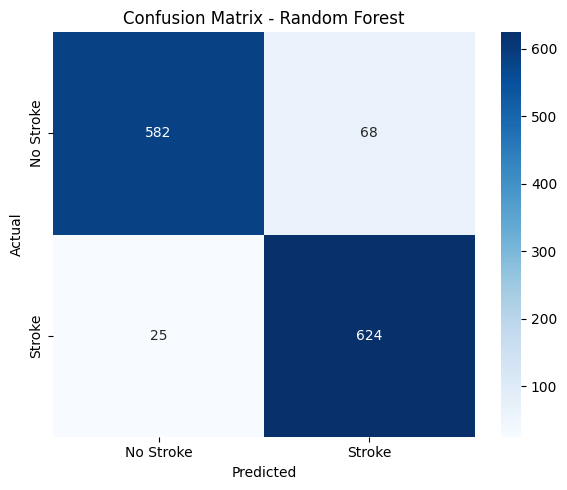

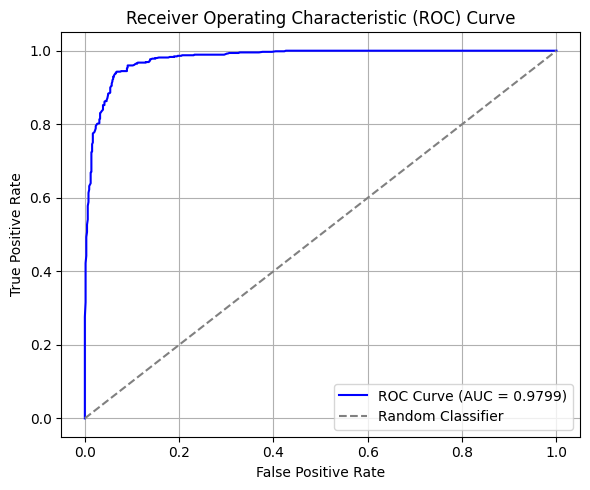

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time

X_balanced, y_balanced = smote.fit_resample(X , y)

print("\nClass Distribution AFTER SMOTE:")
print(pd.Series(y_balanced).value_counts())

print(f"\nTotal dataset after SMOTE: {len(X_balanced)} (Expected ≈ 6492)")

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size : {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features=10,
    random_state=42,
    class_weight='balanced'
)


# Train time
start_train = time.time()
rf_model.fit(X_train_scaled, y_train)
end_train = time.time()
rf_train_time = end_train - start_train

# Test time
start_test = time.time()
y_pred = rf_model.predict(X_test_scaled)
end_test = time.time()
rf_test_time = end_test - start_test

y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Store each metric as variable
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Combine into a dictionary for future use
rf_metrics = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1,
    "ROC AUC": rf_roc_auc
}

# Print metrics
print("\nRandom Forest Model Performance on Test Set:")
for key, value in rf_metrics.items():
    print(f"{key:9}: {value:.4f}")

# Print training and testing times
print(f"\nRF Train Time: {rf_train_time:.3f} sec")
print(f"RF Test Time: {rf_test_time:.3f} sec")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**K Nearest Neighbours (KNN)**

You're using KNN with k=10 and the Euclidean distance metric. You can compare its performance with other models using the evaluation metrics


Class Distribution AFTER SMOTE:
stroke
1    3246
0    3246
Name: count, dtype: int64

Total dataset after SMOTE: 6492 (Expected ≈ 6492)

Train size: 5193
Test size : 1299

KNN Model Performance on Test Set:
Accuracy : 0.8676
Precision: 0.8281
Recall   : 0.9276
F1 Score : 0.8750
ROC AUC  : 0.9464

KNN Train Time: 0.010 sec
KNN Test Time: 0.178 sec

Confusion Matrix:
[[525 125]
 [ 47 602]]


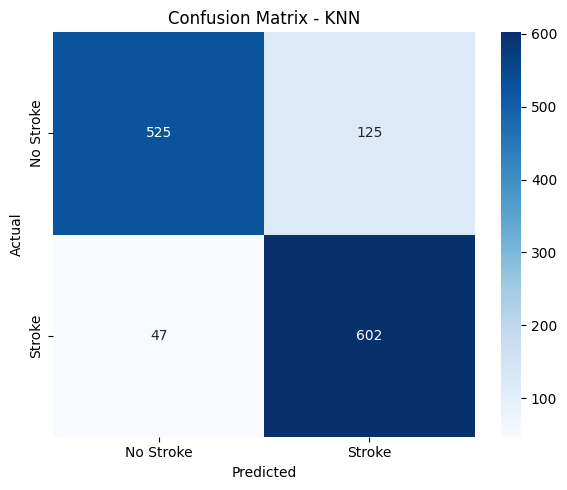

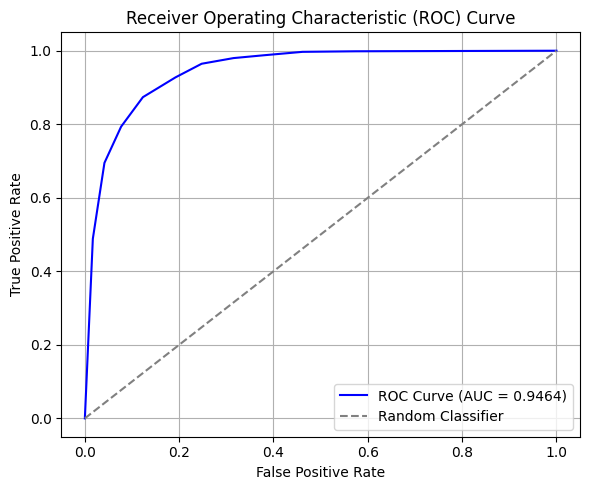

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time

X_balanced, y_balanced = smote.fit_resample(X , y)

print("\nClass Distribution AFTER SMOTE:")
print(pd.Series(y_balanced).value_counts())

print(f"\nTotal dataset after SMOTE: {len(X_balanced)} (Expected ≈ 6492)")

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size : {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Train time
start_train = time.time()
knn_model.fit(X_train_scaled, y_train)
end_train = time.time()
knn_train_time = end_train - start_train

# ------------------ 8. Predict & Evaluate ------------------
# Test time
start_test = time.time()
y_pred = knn_model.predict(X_test_scaled)
end_test = time.time()
knn_test_time = end_test - start_test

y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# Store each metric as variable
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Combine into a dictionary for future use
knn_metrics = {
    "Accuracy": knn_accuracy,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1 Score": knn_f1,
    "ROC AUC": knn_roc_auc
}

# Print metrics
print("\nKNN Model Performance on Test Set:")
for key, value in knn_metrics.items():
    print(f"{key:9}: {value:.4f}")

# Print training and testing times
print(f"\nKNN Train Time: {knn_train_time:.3f} sec")
print(f"KNN Test Time: {knn_test_time:.3f} sec")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {knn_roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Extreme Gradient Boosting (XGB)**


Class Distribution AFTER SMOTE:
stroke
1    3246
0    3246
Name: count, dtype: int64

Total dataset after SMOTE: 6492 (Expected ≈ 6492)

Train size: 5193
Test size : 1299


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[19:09:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Model Performance on Test Set:
Accuracy : 0.9492
Precision: 0.9370
Recall   : 0.9630
F1 Score : 0.9498
ROC AUC  : 0.9886

XGB Train Time: 0.178 sec
XGB Test Time: 0.005 sec

Confusion Matrix:
[[608  42]
 [ 24 625]]


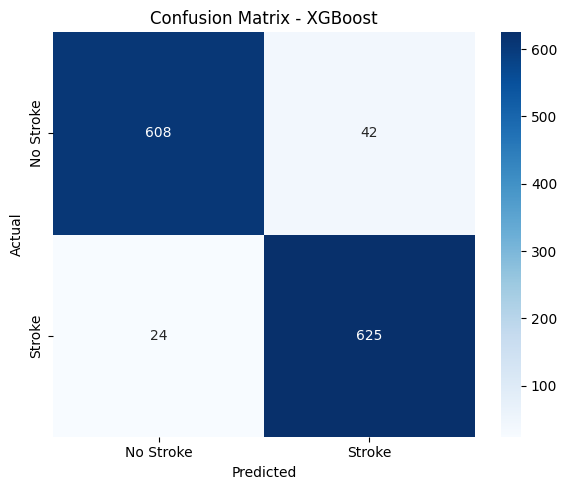

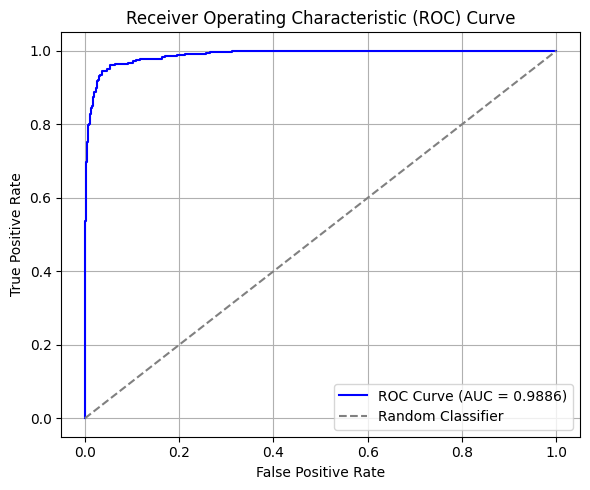

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time

X_balanced, y_balanced = smote.fit_resample(X , y)

print("\nClass Distribution AFTER SMOTE:")
print(pd.Series(y_balanced).value_counts())

print(f"\nTotal dataset after SMOTE: {len(X_balanced)} (Expected ≈ 6492)")

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size : {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.3,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train time
start_train = time.time()
xgb_model.fit(X_train_scaled, y_train)
end_train = time.time()
xgb_train_time = end_train - start_train

# Test time
start_test = time.time()
y_pred = xgb_model.predict(X_test_scaled)
end_test = time.time()
xgb_test_time = end_test - start_test

y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Store each metric as variable
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Combine into a dictionary for future use
xgb_metrics = {
    "Accuracy": xgb_accuracy,
    "Precision": xgb_precision,
    "Recall": xgb_recall,
    "F1 Score": xgb_f1,
    "ROC AUC": xgb_roc_auc
}

# Print metrics
print("\nXGBoost Model Performance on Test Set:")
for key, value in xgb_metrics.items():
    print(f"{key:9}: {value:.4f}")

# Print training and testing times
print(f"\nXGB Train Time: {xgb_train_time:.3f} sec")
print(f"XGB Test Time: {xgb_test_time:.3f} sec")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {xgb_roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Higher AUC is generally better: A higher AUC indicates that the model is better at distinguishing between the positive and negative classes.

ANN


Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6573 - loss: 0.4361 - val_accuracy: 0.7844 - val_loss: 0.3830 - learning_rate: 2.0000e-04
Epoch 2/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7989 - loss: 0.3740 - val_accuracy: 0.7875 - val_loss: 0.3585 - learning_rate: 2.0000e-04
Epoch 3/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8239 - loss: 0.3480 - val_accuracy: 0.8129 - val_loss: 0.3328 - learning_rate: 2.0000e-04
Epoch 4/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8415 - loss: 0.3233 - val_accuracy: 0.8329 - val_loss: 0.3068 - learning_rate: 2.0000e-04
Epoch 5/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8461 - loss: 0.2990 - val_accuracy: 0.8568 - val_loss: 0.2819 - learning_rate: 2.0000e-04
Epoch 6/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8422 - loss: 0.2771 - val_accuracy: 0.8661 - val_loss: 0.2590 - learning_rate: 2.0000e-04
Epoch 7/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8517 - loss: 0.2537 - 

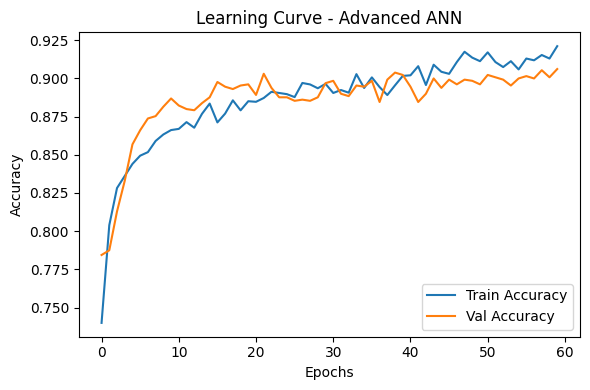

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Custom focal loss
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.exp(-bce)
        return alpha * (1 - bce_exp) ** gamma * bce
    return los
    whatwhs

# Data Prep
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model
model = Sequential([
    Dense(512, kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),gnm
    Dropout(0.15),

    Dense(256, kernel_regularizer=regularizers.l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.15),

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# Compile with Adam & Focal Loss
model.compile(optimizer=Adam(learning_rate=2e-4),
              loss=focal_loss(gamma=2., alpha=0.25),
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6)

# Train
history = model.fit(X_train, y_train, epochs=60, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr], verbose=1)

# Predict
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate
ann_accuracy = accuracy_score(y_test, y_pred)
ann_precision = precision_score(y_test, y_pred, zero_division=0)
ann_recall = recall_score(y_test, y_pred, zero_division=0)
ann_f1 = f1_score(y_test, y_pred, zero_division=0)
ann_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n Accuracy   : {ann_accuracy:.4f}")
print(f" Precision  : {ann_precision:.4f}")
print(f" Recall     : {ann_recall:.4f}")
print(f" F1 Score   : {ann_f1:.4f}")
print(f"ROC AUC    : {ann_roc_auc:.4f}")

ann_metrics = {
    "Accuracy": ann_accuracy,
    "Precision": ann_precision,
    "Recall": ann_recall,
    "F1 Score": ann_f1,
    "ROC AUC": ann_roc_auc
}

# Plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Advanced ANN")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (5193, 11)
X_test shape : (1299, 11)


CNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 63s 765ms/step - Precision: 0.5725 - Recall: 0.5504 - accuracy: 0.5727 - loss: 3.6123 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 3.5087 - learning_rate: 2.0000e-04
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 442ms/step - Precision: 0.6279 - Recall: 0.6160 - accuracy: 0.6262 - loss: 3.2237 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 3.4618 - learning_rate: 2.0000e-04
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 446ms/step - Precision: 0.6624 - Recall: 0.6528 - accuracy: 0.6635 - loss: 2.9112 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 3.3705 - learning_rate: 2.0000e-04
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 427ms/step - Precision: 0.6988 - Recall: 0.6933 - accuracy: 0.7011 - loss: 2.6142 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 3.0615 - learning_rate: 2.0000e-04
Epoch 5/40
7

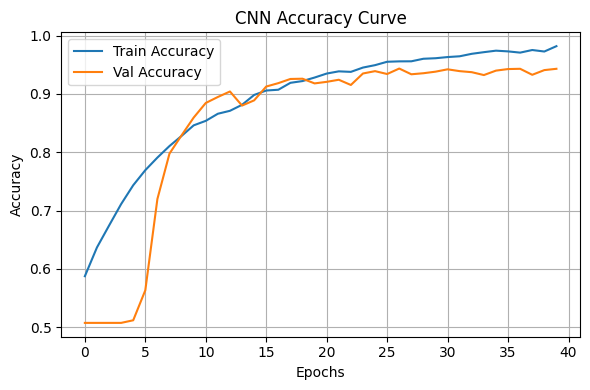

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# ----- Generate Synthetic Data -----
X, y = make_classification(n_samples=10000, n_features=50, n_informative=40, n_redundant=10,
                          n_classes=2, weights=[0.3, 0.7], random_state=42)

# ----- SMOTE -----
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ----- Scale -----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----- Reshape for CNN -----
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ----- CNN Model -----
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv1D(128, kernel_size=2, padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(256, kernel_size=2, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(512, kernel_size=2, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(512, kernel_size=2, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Dense(128, kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=2e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

    return model

model = create_cnn_model((X_train.shape[1], 1))

# ----- Callbacks -----
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# ----- Compute Class Weights -----
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# ----- Train -----
history = model.fit(X_train, y_train, epochs=40, batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr],
                    class_weight=class_weight_dict,
                    verbose=1)

# ----- Evaluate -----
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.4).astype(int)  # Adjusted threshold

cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, zero_division=0)
cnn_recall = recall_score(y_test, y_pred, zero_division=0)
cnn_f1 = f1_score(y_test, y_pred, zero_division=0)
cnn_roc_auc = roc_auc_score(y_test, y_pred_proba)

# ----- Results -----
print("\n🎯 Evaluation Metrics:")
print(f" Accuracy   : {cnn_accuracy:.4f}")
print(f" Precision  : {cnn_precision:.4f}")
print(f" Recall     : {cnn_recall:.4f}")
print(f" F1 Score   : {cnn_f1:.4f}")
print(f" ROC AUC    : {cnn_roc_auc:.4f}")

cnn_metrics = {
    "Accuracy": cnn_accuracy,
    "Precision": cnn_precision,
    "Recall": cnn_recall,
    "F1 Score": cnn_f1,
    "ROC AUC": cnn_roc_auc
}
# ----- Plot -----
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')



plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

LSTM

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 352ms/step - Precision: 0.5550 - Recall: 0.5398 - accuracy: 0.5514 - loss: 1.1486 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 1.0507 - learning_rate: 2.0000e-04
Epoch 2/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 342ms/step - Precision: 0.6155 - Recall: 0.6309 - accuracy: 0.6223 - loss: 1.0273 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5074 - val_loss: 1.0533 - learning_rate: 2.0000e-04
Epoch 3/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 82s 342ms/step - Precision: 0.6546 - Recall: 0.6479 - accuracy: 0.6525 - loss: 0.9760 - val_Precision: 0.6365 - val_Recall: 0.3833 - val_accuracy: 0.5884 - val_loss: 0.9794 - learning_rate: 2.0000e-04
Epoch 4/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 83s 352ms/step - Precision: 0.6797 - Recall: 0.6904 - accuracy: 0.6884 - loss: 0.9263 - val_Precision: 0.6736 - val_Recall: 0.5867 - val_accuracy: 0.6564 - val_loss: 0.9304 - learning_rate: 2.0000e-04
Epoch 5/60
140/140 ━━━━━━━━━━━━

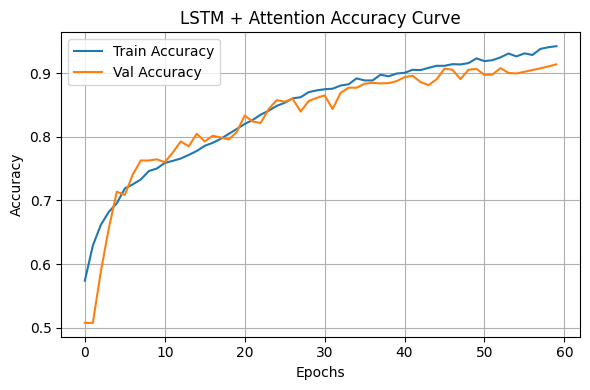

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, LeakyReLU, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# ----- Fixed Attention Layer -----
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()
        self.W = Dense(1)

    def call(self, inputs):
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# ----- Generate Synthetic Data -----
X, y = make_classification(n_samples=10000, n_features=50, n_informative=40, n_redundant=10,
                           n_classes=2, weights=[0.3, 0.7], random_state=42)

# ----- Apply SMOTE -----
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ----- Scaling -----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----- Reshape for LSTM -----
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ----- Build LSTM + Attention Model -----
def create_bilstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Bidirectional(LSTM(128, return_sequences=True))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Attention()(x)

    x = Dense(256, kernel_regularizer=l2(0.001))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, kernel_regularizer=l2(0.001))(x)
    x = tf.keras.activations.relu(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)

    optimizer = Adam(learning_rate=2e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall'])

    return model

model = create_bilstm_attention_model((X_train.shape[1], 1))

# ----- Callbacks -----
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

# ----- Class Weights -----
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# ----- Train -----
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr],
                    class_weight=class_weight_dict,
                    verbose=1)

# ----- Evaluate -----
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred, zero_division=0)
lstm_recall = recall_score(y_test, y_pred, zero_division=0)
lstm_f1 = f1_score(y_test, y_pred, zero_division=0)
lstm_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n🎯 Evaluation Metrics:")
print(f" Accuracy   : {lstm_accuracy:.4f}")
print(f" Precision  : {lstm_precision:.4f}")
print(f" Recall     : {lstm_recall:.4f}")
print(f" F1 Score   : {lstm_f1:.4f}")
print(f" ROC AUC    : {lstm_roc_auc:.4f}")

lstm_metrics = {
    "Accuracy": lstm_accuracy,
    "Precision": lstm_precision,
    "Recall": lstm_recall,
    "F1 Score": lstm_f1,
    "ROC AUC": lstm_roc_auc
}

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ----- Plot Accuracy Curve -----
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM + Attention Accuracy Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

cnn+lstm new

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



Epoch 1/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 92s 423ms/step - accuracy: 0.5319 - loss: 1.0601 - val_accuracy: 0.4841 - val_loss: 1.1441 - learning_rate: 8.0000e-05
Epoch 2/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 61s 302ms/step - accuracy: 0.5831 - loss: 0.9733 - val_accuracy: 0.4841 - val_loss: 1.1950 - learning_rate: 8.0000e-05
Epoch 3/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 80s 288ms/step - accuracy: 0.6283 - loss: 0.9168 - val_accuracy: 0.6457 - val_loss: 0.9196 - learning_rate: 8.0000e-05
Epoch 4/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 93s 357ms/step - accuracy: 0.6630 - loss: 0.8744 - val_accuracy: 0.7706 - val_loss: 0.7502 - learning_rate: 8.0000e-05
Epoch 5/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 71s 287ms/step - accuracy: 0.6942 - loss: 0.8362 - val_accuracy: 0.8004 - val_loss: 0.6890 - learning_rate: 8.0000e-05
Epoch 6/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 81s 286ms/step - accuracy: 0.7405 - loss: 0.7836 - val_accuracy: 0.8169 - val_loss: 0.6686 - learning_rate: 8.0000e-05
Epoch 7/40
168/168 ━━━━━━━━━━━━━━━━━━━━ 48s 28

<ipython-input-44-3cc9e351464a>:123: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



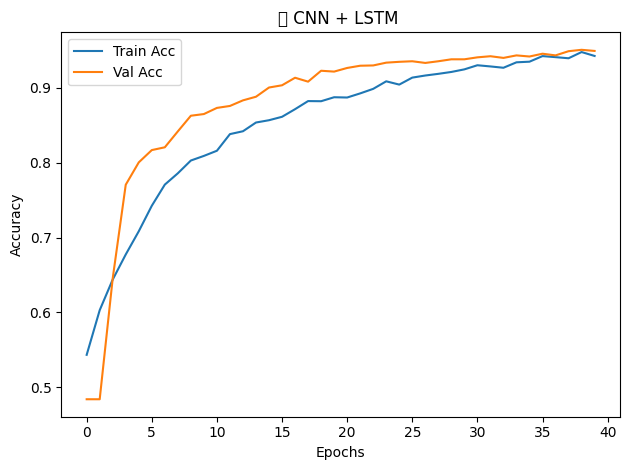

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, LeakyReLU, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Data
X, y = make_classification(n_samples=12000, n_features=50, n_informative=40, n_redundant=10,
                           n_classes=2, weights=[0.3, 0.7], random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Model
def create_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv1D(256, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(0.0005))(inputs)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.25)(x)

    x = Conv1D(512, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(0.0005))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)
    x = Bidirectional(LSTM(64))(x)
    x = BatchNormalization()(x)

    x = Dense(256, kernel_regularizer=regularizers.l2(0.0005))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(128)(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)

    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs, outputs)

model = create_model((X_train.shape[1], 1))

model.compile(optimizer=Adam(learning_rate=8e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

# Train
# Train with Reduced Epochs
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Metrics
cnn_lstm_accuracy = accuracy_score(y_test, y_pred)
cnn_lstm_precision = precision_score(y_test, y_pred, zero_division=0)
cnn_lstm_recall = recall_score(y_test, y_pred, zero_division=0)
cnn_lstm_f1 = f1_score(y_test, y_pred, zero_division=0)
cnn_lstm_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n Accuracy   : {cnn_lstm_accuracy:.4f}")
print(f"Precision  : {cnn_lstm_precision:.4f}")
print(f" Recall     : {cnn_lstm_recall:.4f}")
print(f" F1 Score   : {cnn_lstm_f1:.4f}")
print(f" ROC AUC    : {cnn_lstm_roc_auc:.4f}")

cnn_lstm_metrics = {
    "Accuracy": cnn_lstm_accuracy,
    "Precision": cnn_lstm_precision,
    "Recall": cnn_lstm_recall,
    "F1 Score": cnn_lstm_f1,
    "ROC AUC": cnn_lstm_roc_auc
}

# Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("🔥 CNN + LSTM ")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Combine all dictionaries into one
all_metrics = {
    "Logistic Regression": lr_metrics,
    "Random Forest": rf_metrics,
    "KNN": knn_metrics,
    "XGBoost": xgb_metrics,
    "ANN": ann_metrics,
    "CNN": cnn_metrics,
    "LSTM": lstm_metrics,
    "CNN + LSTM": cnn_lstm_metrics
}

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics).T  # Transpose to have models as rows

# Display full comparison table
print("\n📊 Model Performance Comparison:")
print(metrics_df.sort_values(by="Accuracy", ascending=False))

# Optionally: Highlight the best model per metric
best_models = metrics_df.idxmax()
print("\n🏆 Best Models per Metric:")
print(best_models)

# Overall Best Model by Accuracy
overall_best = metrics_df.sort_values(by="Accuracy", ascending=False).index[0]
print(f"\n Best Overall Model (by Accuracy): {overall_best}")



📊 Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
CNN + LSTM           0.956729   0.967532  0.947947  0.957639  0.989179
XGBoost              0.949192   0.937031  0.963020  0.949848  0.988624
CNN                  0.945240   0.962882  0.928421  0.945338  0.986352
Random Forest        0.928406   0.901734  0.961479  0.930649  0.979935
LSTM                 0.924123   0.939175  0.910175  0.924448  0.974897
ANN                  0.905312   0.872093  0.944882  0.907029  0.966002
KNN                  0.867590   0.828061  0.927581  0.875000  0.946422
Logistic Regression  0.799846   0.788148  0.819723  0.803625  0.881662

🏆 Best Models per Metric:
Accuracy     CNN + LSTM
Precision    CNN + LSTM
Recall          XGBoost
F1 Score     CNN + LSTM
ROC AUC      CNN + LSTM
dtype: object

 Best Overall Model (by Accuracy): CNN + LSTM


In [ ]:
!pip install shap

In [ ]:
import shap

# Add these lines before creating the DeepExplainer
shap.explainers._deep.deep_tf.op_handlers["LeakyRelu"] = shap.explainers._deep.deep_tf.passthrough
shap.explainers._deep.deep_tf.op_handlers["LeakyReLU"] = shap.explainers._deep.deep_tf.passthrough  # Handle different naming

# Then create your explainer as before
explainer = shap.DeepExplainer(model, background)


In [ ]:
# Add SHAP imports at the top with other imports
import shap

# ... [keep all your existing code until after model training] ...

# Assign model (already done in your code, but confirming)
model = create_model((X_train.shape[1], 1))

# ... [keep existing compilation and training code] ...

# SHAP Implementation ========================================================

# 1. Prepare SHAP background data (100 samples)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# 2. Create DeepExplainer
explainer = shap.DeepExplainer(model, background)

# 3. Calculate SHAP values for test samples
test_samples = X_test[:100]  # Use first 100 test samples for efficiency
shap_values = explainer.shap_values(
    test_samples,
    check_additivity=False  # Bypasses gradient verification
)

# 4. Plot Summary Plot
shap.summary_plot(
    shap_values[0],
    test_samples.reshape(100, X_test.shape[1]),  # Flatten time dimension
    feature_names=[f"Time {t}" for t in range(X_test.shape[1])],
    plot_type="bar",
    show=False
)
plt.title("CNN+LSTM Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# 5. Individual Force Plot
sample_idx = 0  # First test sample
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][sample_idx].reshape(-1),
    test_samples[sample_idx].reshape(-1),
    feature_names=[f"Time {t}" for t in range(X_test.shape[1])],
    matplotlib=True
)
plt.title(f"SHAP Force Plot - Sample {sample_idx}")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_992
Received: inputs=['Tensor(shape=(100, 50, 1))']

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_992
Received: inputs=['Tensor(shape=(200, 50, 1))']



StagingError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py", line 265, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_TensorListStack


shap for best model (optional)

LIME

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=36e38fcd8caf1bcaff229cfc3e684f2b28fdb72a715b56afdac211891289f58d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow-text 2.1

In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])


In [ ]:
def cnn_lstm_predict_proba(data_flat):
    data_reshaped = data_flat.reshape((data_flat.shape[0], data_flat.shape[1], 1))
    probs = model.predict(data_reshaped)
    return np.concatenate([(1 - probs), probs], axis=1)  # shape: [samples, 2]


In [ ]:
feature_names = [f"feature_{i}" for i in range(X_train_flat.shape[1])]
class_names = ['No Stroke', 'Stroke']

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)


In [ ]:
i = 10  # index of sample
exp = explainer.explain_instance(
    data_row=X_test_flat[i],
    predict_fn=cnn_lstm_predict_proba,
    num_features=10
)


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)
